<a href="https://colab.research.google.com/github/fsluizvictor/backpropagation/blob/main/Backprop_Exercise_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from sklearn.metrics import accuracy_score
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ALGORITHM STEPS

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time

## QUESTIONS

Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

1 - Which patterns was the neural network able to learn quickly and which took longer?

- Diamond Pattern - Convergiu em 50 interações
- Circle pattern - Convergiu em 200 interações
- Centered square - Convergiu em 100 interações
- Thick Right Angle pattern - Convergiu com 250 interações
- Thin right angle pattern - Convergiu com 250 interações

2 - What learning rates and numbers of iterations worked well?



*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.9
*   Não convergiu


---


*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.5
*   Não convergiu


---


*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.3
*   Não convergiu


---


*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.1
*   Covergiu mas teve muitas variações no gráfico
*   A acurácia teve muita variação



---


*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.01
*   Demorou a Covergir e teve muitas variações no gráfico 
*   A acurácia teve muita variação


---

*   NUMBER_INTERACTIONS = 250 LEARNING_RATE = 0.03
*   Convergiu rapidamente
*   A acurácia variou muito 


---

*   NUMBER_INTERACTIONS = 1000 LEARNING_RATE = 0.03
*   Convergiu rapidamente
*   Boa acurácia, o gráfico da acurácia teve algumas variações


---

*   NUMBER_INTERACTIONS = 5000 LEARNING_RATE = 0.03
*   Convergiu rapidamente
*   Boa acurácia, o gráfico da acurácia ficou bem regulado


---

*   NUMBER_INTERACTIONS = 10000 LEARNING_RATE = 0.03
*   Convergiu rapidamente, bem semelhante aos resultados anteriores
*   Boa acurácia, o gráfico da acurácia ficou mais ajustado em alguns pontos


**Melhor learning rates and numbers of iterations: 10000 e 0.03**


shape of x_mat_full is (500, 3)
shape of y is (500,)


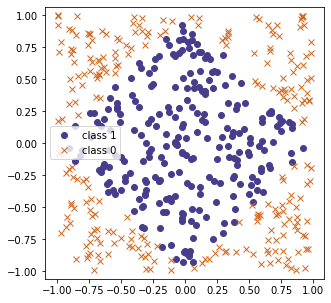

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

NUM_OBS = 500
x_mat_1 = np.random.uniform(-1,1,size = (NUM_OBS,2))
x_mat_bias = np.ones((NUM_OBS,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # oficial pattern
# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

In [4]:
def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

In [5]:
def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient

In [6]:
def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

In [7]:
def sum_mean_square_error(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

In [8]:
def classification_metric_values(y_pred):
  return np.where(y_pred > 0.5, 1, 0)

Complete the pseudocode below

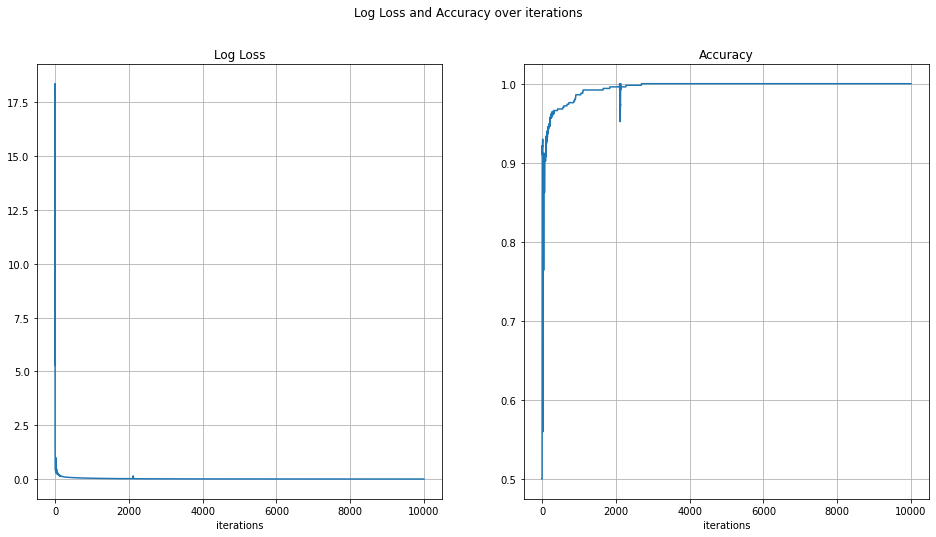

In [22]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1, size = (3,NUM_OBS))
W_2 = np.random.uniform(-1,1, size = (NUM_OBS,1))
NUMBER_INTERACTIONS = 10000
LEARNIG_RATE = 0.03
PRINT_STEP = 1000
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(NUMBER_INTERACTIONS):

    ### Do a forward computation, and get the gradient
  
    y_pred, gradient = forward_pass(W_1, W_2)
  
    ## Update the weight matrices

    W_1 -= LEARNIG_RATE * gradient[0]
    W_2 -= LEARNIG_RATE * gradient[1].reshape((500,1))

    ### Compute the loss

    loss_vals.append(loss_fn(y, y_pred))

    ### Compute the loss and accuracy

    accuracies.append(accuracy_score(y,classification_metric_values(y_pred)))
    # accuracies.append(sum_mean_square_error(classification_metric_values(y_pred), y))

    ## Print the loss and accuracy for every 200th iteration

    #if (i+1) % PRINT_STEP == 0:
      # plot_loss_accuracy(loss_vals, accuracies)

plot_loss_accuracy(loss_vals, accuracies)



*   NUMBER_INTERACTIONS = 250
*   LEARNING_RATE = 0.9

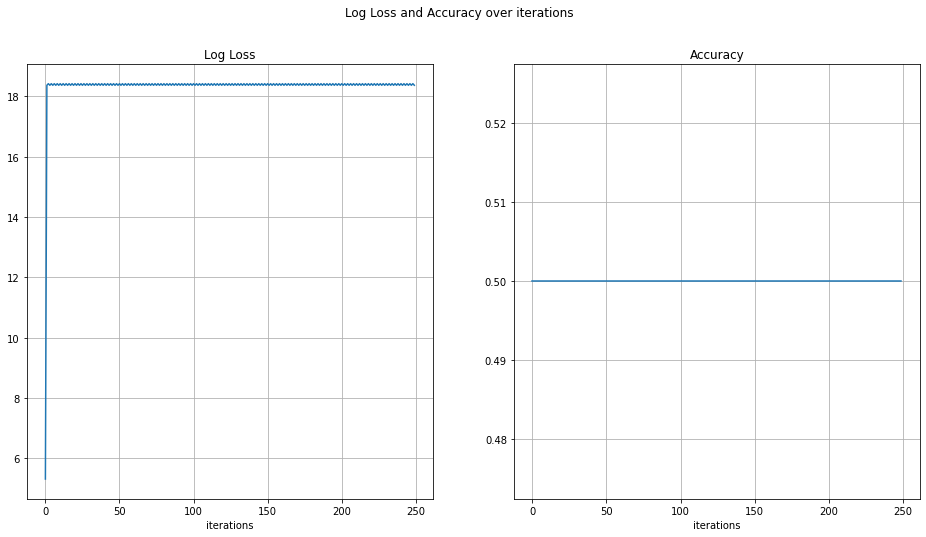





*   NUMBER_INTERACTIONS = 250 
*   LEARNING_RATE = 0.5

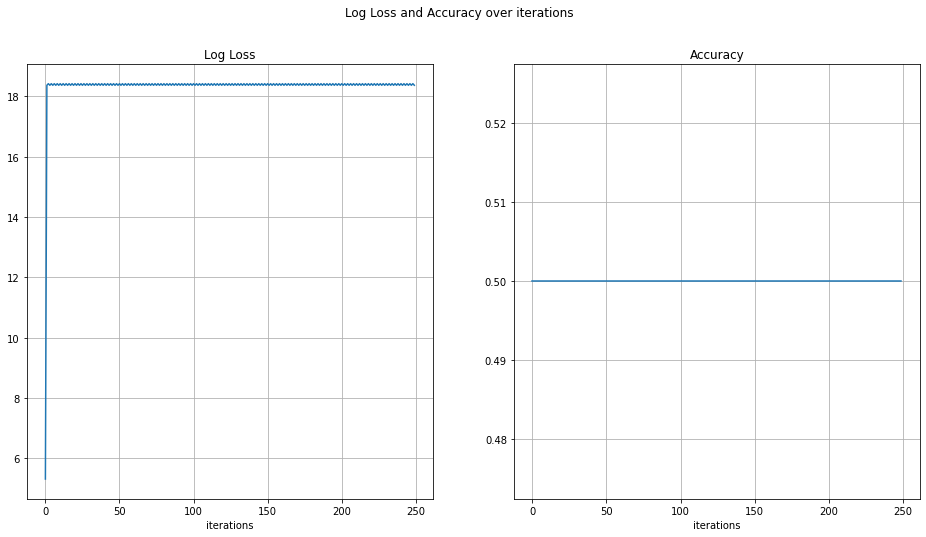





*   NUMBER_INTERACTIONS = 250 
*   LEARNING_RATE = 0.3

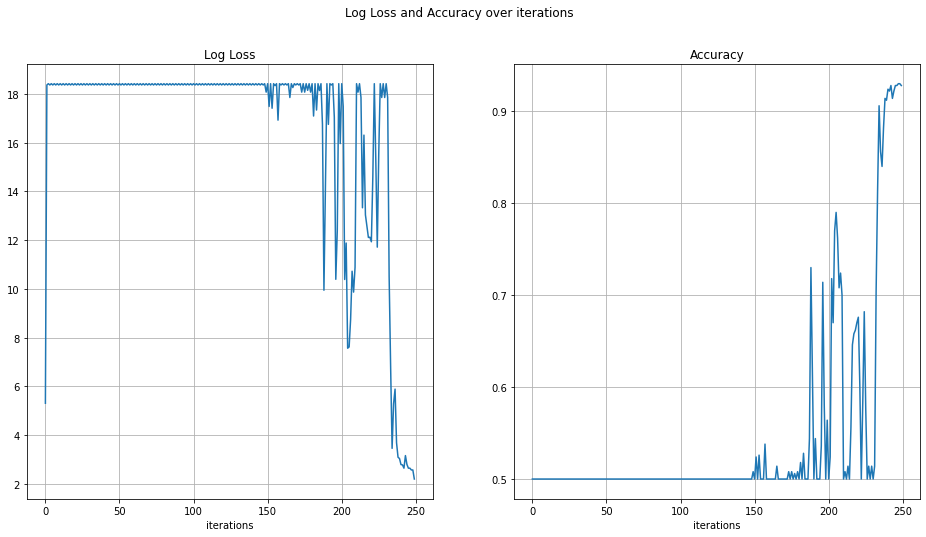





*   NUMBER_INTERACTIONS = 250 
*   LEARNING_RATE = 0.1

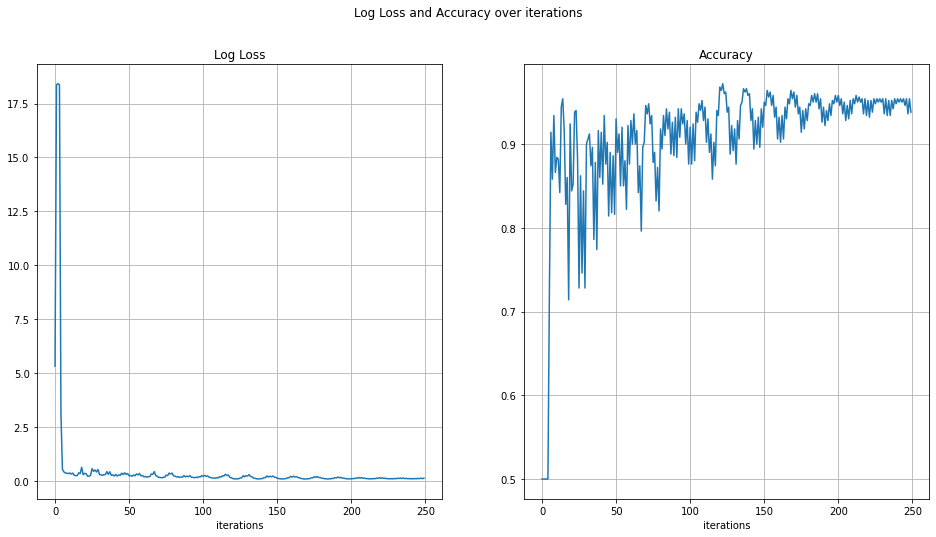





*   NUMBER_INTERACTIONS = 250 
*   LEARNING_RATE = 0.01

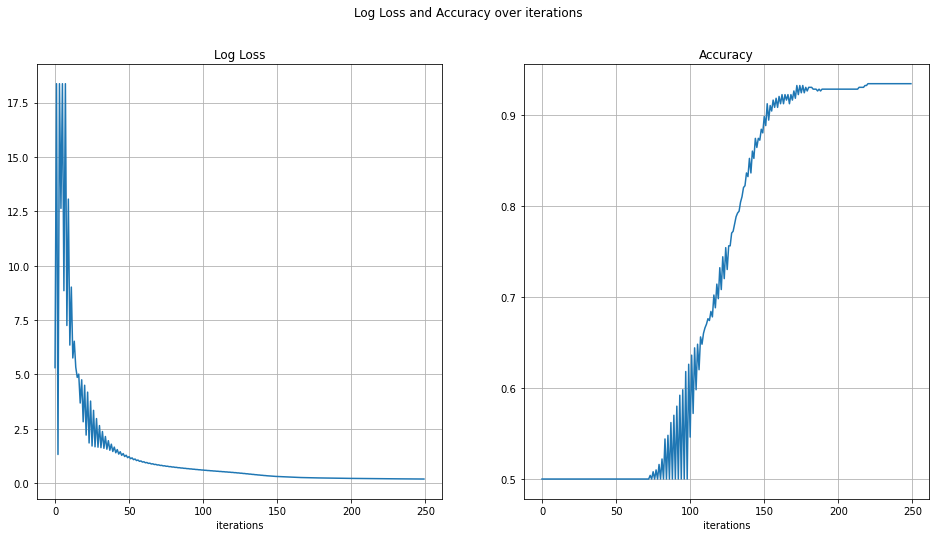





*   NUMBER_INTERACTIONS = 250 
*   LEARNING_RATE = 0.03

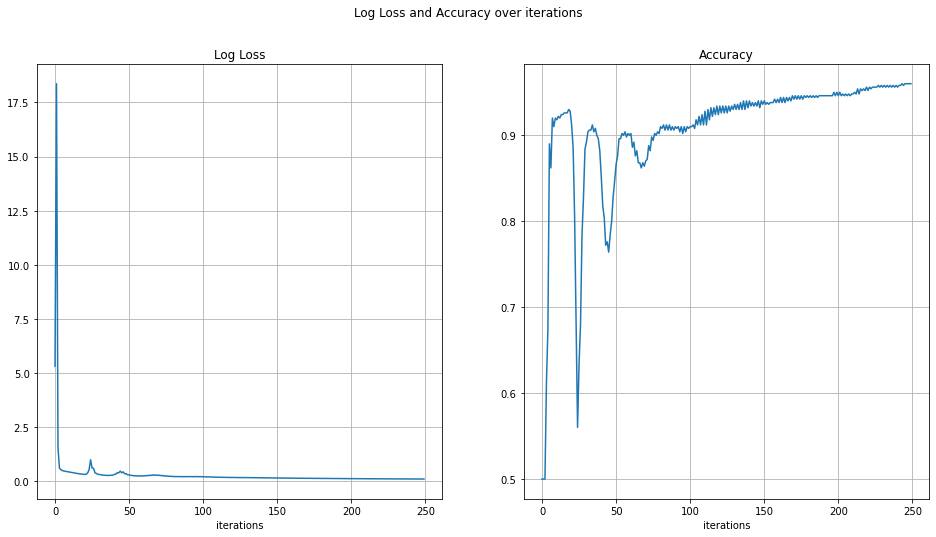





*   NUMBER_INTERACTIONS = 1000 
*   LEARNING_RATE = 0.03

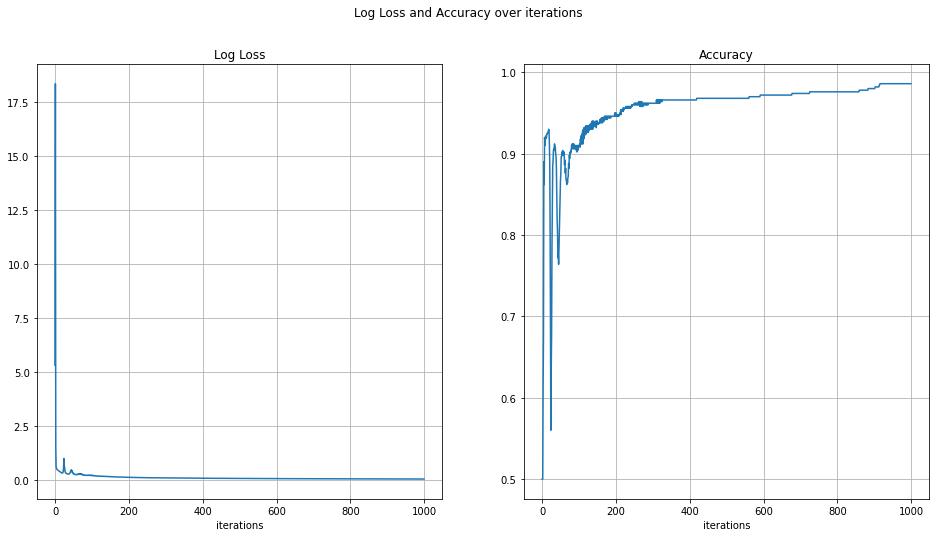




*   NUMBER_INTERACTIONS = 5000
*   LEARNIG_RATE = 0.03

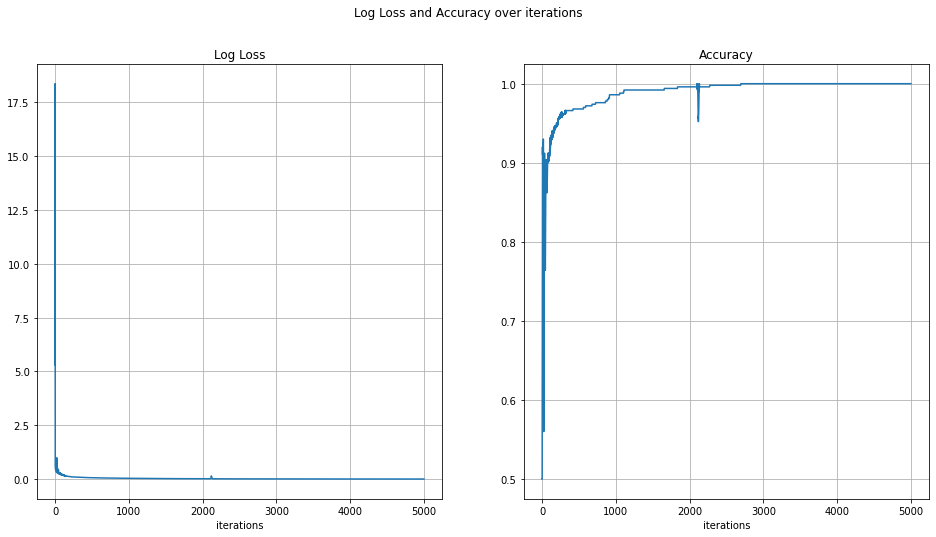


*   NUMBER_INTERACTIONS = 10000
*   LEARNIG_RATE = 0.03

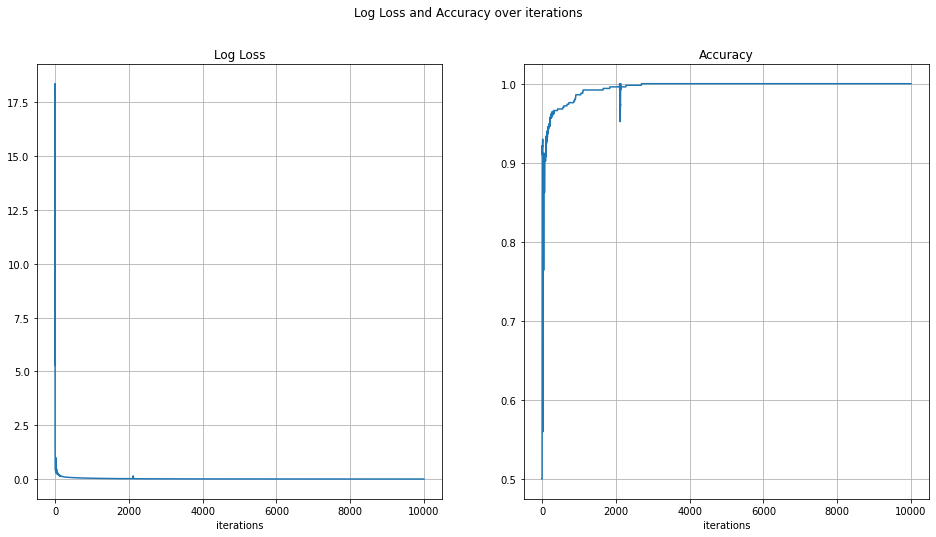

